In [ ]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [ ]:
##from google.colab import drive
##drive.mount('/content/drive')

In [ ]:
DIRECTORY = r"/content/drive/MyDrive/leaf/Leaf_2"
##CATAGORIES = ['Strawberry_fresh','Strawberry_scrotch','Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy']
CATAGORIES = ['Healthy_Leaf','Unhealthy_Leaf']

In [ ]:
data = []

for categories in CATAGORIES:
    folder=os.path.join(DIRECTORY,categories)
    print(folder)
    label=CATAGORIES.index(categories)


    for img in os.listdir(folder):
        img=os.path.join(folder,img)
        img_arr=cv2.imread(img)
        img_arr=cv2.resize(img_arr,(100,100))
        #img_arr=np.array(img_arr).flatten()
        data.append([img_arr,label])

/content/drive/MyDrive/leaf/Leaf_2/Healthy_Leaf
/content/drive/MyDrive/leaf/Leaf_2/Unhealthy_Leaf


In [ ]:
#data

In [ ]:
random.shuffle(data)

In [ ]:
x=[]
y=[]


for features,label in data:
    x.append(features)
    y.append(label)

In [ ]:
X= np.array(x)
Y=np.array(y)

In [ ]:
#X

In [ ]:
X = X/255

In [ ]:
#X

In [ ]:
X.shape

(4797, 100, 100, 3)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [ ]:

# Uninstall the current version of TensorFlow.
#!pip uninstall tensorflow -2.13.0

# Install TensorFlow 1.15.0.
#!pip install tensorflow==2.12.0

# Verify the TensorFlow version.
#import tensorflow as tf
#print(tf.__version__)

In [ ]:
#tenserflow 2.12.0
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.python.keras.models import Sequential
#from tensorflow.python.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation


#tenserflow 2.13.0
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation


In [ ]:
#Model

model=Sequential()

#model.add( Conv2D(16,(3,3),activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(1024,(3,3), padding="same",input_shape=X.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(512,(3,3), padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(256,(3,3), padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(128,(3,3), padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(64,(3,3), padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add( Conv2D(32,(3,3), padding="same",activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))





#model.add( Conv2D(64,(3,3),activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))


#model.add( Conv2D(16,(3,3),activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

#model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [ ]:
#compile
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#Train
history = model.fit(X,Y,epochs=25,validation_split=0.3)

Epoch 1/25
 16/105 [===>..........................] - ETA: 1:23:41 - loss: 0.6541 - accuracy: 0.6621

KeyboardInterrupt: ignored

In [ ]:
# Save the model as an HDF5 file
#model.save('/content/drive/MyDrive/leaf/my_model.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 1024)    28672     
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 1024)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 512)       4719104   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 512)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 256)       1179904   
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 256)       0

1/1 [==============================] - 0s 17ms/step
[[1. 0.]]
Healthy_Leaf


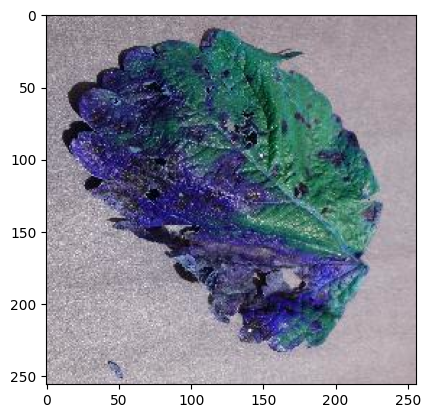

In [ ]:
import keras.utils as img
import matplotlib.pyplot as plt
import numpy as np
import cv2

test_image = cv2.imread("/content/drive/MyDrive/leaf/Leaf_2/Unhealthy_Leaf/1d484d5d-3c15-4a46-9e81-752565989049___RS_L.Scorch 1506.JPG")
plt.imshow(test_image)
img_pred=tf.keras.utils.load_img(r"/content/drive/MyDrive/leaf/Leaf_2/Unhealthy_Leaf/1d484d5d-3c15-4a46-9e81-752565989049___RS_L.Scorch 1506.JPG",target_size=(100,100))


img_pred=tf.keras.utils.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)


#Predict
rslt= model.predict(img_pred)

print(rslt)
if rslt[0][0]>rslt[0][1]:
    prediction="Healthy_Leaf"
else:
    prediction="Unhealthy_Leaf"
print(prediction)

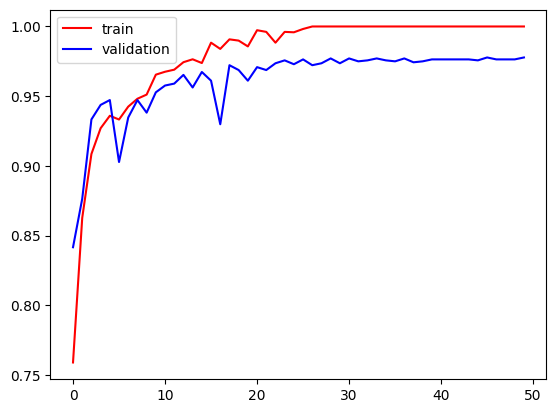

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
#plt.savefig('/content/drive/MyDrive/leaf/Leaf_2/accuracy.png')

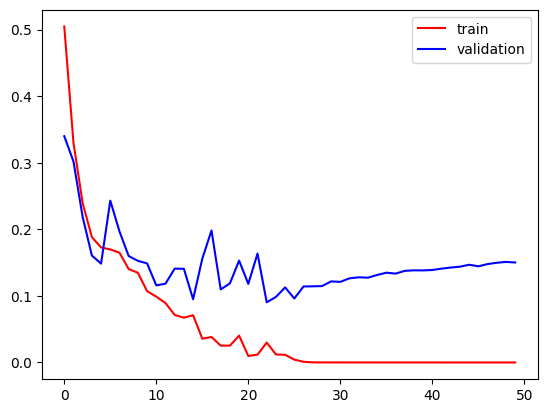

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()
#plt.savefig('/content/drive/MyDrive/leaf/Leaf_2/loss.png')